In [4]:
# parameters
n_slope = 3000
n_burnin = 2000 # default
n_analyze = 2000000 #10,000,000. Unreasonably high
n_steps = n_slope + n_burnin + n_analyze # ising.py takes this as an arg instead of n_slope
N = 100 # 100x100 lattice
b_top = 0.5 # B annealing from .5 to break symmetry at low temperatures

# Checking around Tc
t_min = 2.17
t_step = .1
t_max = 2.38

multiprocess = False # my time series code doesn't work with multiprocess yet

# run simulation (takes about 2.5 minutes per million samples)
# NOTE: this puts data in temporary directories (here, 'snapshots', 'data', and 'series'). Should be moved IMMEDIATELY
# (shell commands to move the data are in the next two cells)

In [2]:
!python ising.py n_steps:$n_steps n_burnin:$n_burnin n_analyze:$n_analyze N:$N b_top:$b_top t_min:$t_min t_max:$t_max \
                 t_step:$t_step multiprocess:$multiprocess

Experiment_name = "Radius_Bounds_exp1"
!mkdir datatests/$Experiment_name 
!mv data datatests/$Experiment_name
!mv snapshots datatests/$Experiment_name
!mv series datatests/$Experiment_name
!mkdir data
!mkdir snapshots
!mkdir series

inp["n_steps"]       set to int     2005000
inp["n_burnin"]      set to int     2000
inp["n_analyze"]     set to int     2000000
inp["N"]             set to int     100
inp["b_top"]         set to float   0.5
inp["t_min"]         set to float   2.17
inp["t_max"]         set to float   2.38
inp["t_step"]        set to float   0.1

2D Ising Model Simulation; single core

100x100 (T=2.17) steps: 2005000/2005000, 100.0%  run time: 00:04:54  est.time-to-go:    done!
100x100 (T=2.27) steps: 2005000/2005000, 100.0%  run time: 00:05:19  est.time-to-go:    done!
100x100 (T=2.37) steps: 2005000/2005000, 100.0%  run time: 00:05:25  est.time-to-go:    done!


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# General things
experiment_name = "Radius_Bounds_exp1"
E = np.load(f"datatests/{experiment_name}/series/E_series.npy")
M = np.load(f"datatests/{experiment_name}/series/M_series.npy")
temps = E[:, 0] # make temp array

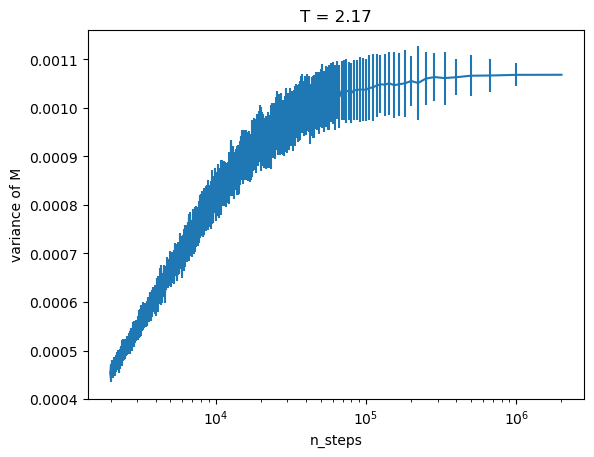

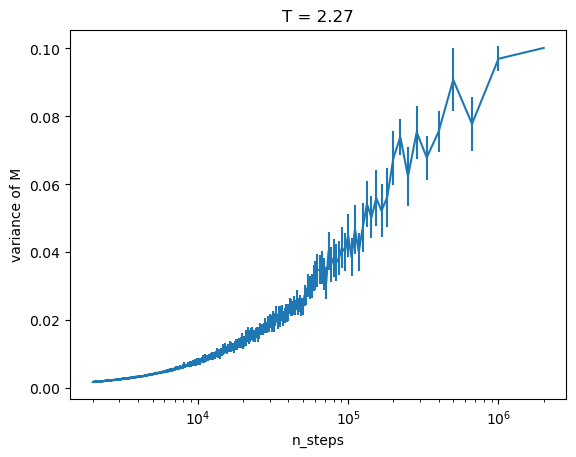

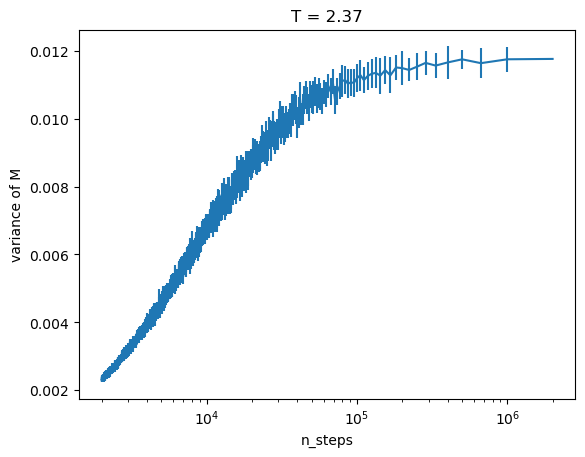

In [9]:
# chooo
variances = []
e_variances = []
for idx, t in enumerate(temps):
    m_series = M[idx][n_burnin+n_slope:]
    n_split = range(1, 1000)
    chi_split = np.ndarray((1000))
    e_chi_split = np.ndarray((1000))
    for i in n_split:
        # split M series data into i equal pieces
        split_m = np.array_split(m_series, i)
        # calculate chi for each piece
        chi_split_vals = [np.var(x) for x in split_m] #can't do array op b/c split_m doesn't always have equal chunks
        # get average value of chi over all pieces
        chi_split[i] = np.average(chi_split_vals)
        # get standard error for chi over all pieces (assuming gaussian dist)
        e_chi_split[i] = np.std(chi_split_vals)/np.sqrt(i)
    variances.append(chi_split[1:])
    e_variances.append(e_chi_split[1:])
    plt.errorbar(n_analyze/np.array(range(1, 1000)), chi_split[1:], yerr=e_chi_split[1:])
    plt.xlabel("n_steps")
    plt.ylabel("variance of M")
    plt.xscale('log')
    plt.title(f"T = {t:.2f}")
    plt.show()